# Classification News

In [256]:
#Imports
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import CountVectorizer
nltk.__version__
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud,STOPWORDS
import re #Regular Expersion
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import seaborn as sns
from keras.utils.vis_utils import plot_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import  LogisticRegression
from sklearn import svm
from sklearn import metrics

In [257]:
#nltk.download()

df = pd.read_csv("new_news")
print(df.head())

df.dropna(inplace= True)

# input
X = df['text']
print("Input " ,X.head())

Y = df["class"]
print("Target " ,y.head())

# Divide Data To training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 53)

                                                text  class
0  aniel greenfiel shillman journal fellourladdom...      0
1  googl pinterest igg linkein reit stumbleupon p...      0
2  u secretari state john f kerri sai monay stop ...      1
3  kaye king kayeek novemb 9 2016 lesson tonight ...      0
4  primari ay neurladd frontrunn hillari clinton ...      1
Input  0    aniel greenfiel shillman journal fellourladdom...
1    googl pinterest igg linkein reit stumbleupon p...
2    u secretari state john f kerri sai monay stop ...
3    kaye king kayeek novemb 9 2016 lesson tonight ...
4    primari ay neurladd frontrunn hillari clinton ...
Name: text, dtype: object
Target  0    0
1    0
2    1
3    0
4    1
Name: class, dtype: int64


In [258]:
# Initialize Tfidf Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform training & test data 
trainTfidf = tfidf_vectorizer.fit_transform(X_train, y_train)
testTfidf = tfidf_vectorizer.transform(X_test)

# Print vectors of tfidf from training data
print("tfidf train : " , trainTfidf.A[:3])

# Print features
print("Tfidf Future : ",tfidf_vectorizer.get_feature_names()[:20]) 

tfidf train :  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Tfidf Future :  ['00', '000', '0000', '0000000031', '000000031', '00001400', '00006', '00017b2908ff9fa45188243f49aaeeb2hrcofficecom', '0004', '0005', '0006', '0007', '0008', '001', '002', '0026', '005', '007', '007010', '00amouselistenerthi']


In [259]:
# Init. CountVectorizer object
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training & test data using 'text' column
trainCountVector = count_vectorizer.fit_transform(X_train)
testCountVector = count_vectorizer.transform(X_test)

# Print first features from count_vectorizer
print("features of the count_vectorizer : ",count_vectorizer.get_feature_names()[:20])

features of the count_vectorizer :  ['00', '000', '0000', '0000000031', '000000031', '00001400', '00006', '00017b2908ff9fa45188243f49aaeeb2hrcofficecom', '0004', '0005', '0006', '0007', '0008', '001', '002', '0026', '005', '007', '007010', '00amouselistenerthi']


In [260]:
# Create the TfidfVectorizer & CountVectorizer DataFrames
tfidf_df = pd.DataFrame(trainTfidf.A, columns=tfidf_vectorizer.get_feature_names())
count_df = pd.DataFrame(trainCountVector.A, columns=count_vectorizer.get_feature_names())

# Calc difference between columns 
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

{'urladd'}


Class 0 :


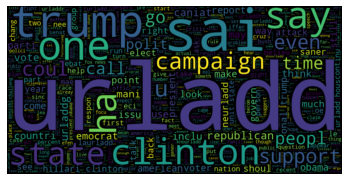

Class 1 :


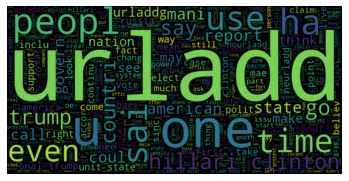

In [261]:
words1=" ".join(df[df['class'] == 1].text)
words0=" ".join(df[df['class'] == 0].text)
wordcloud1=WordCloud(max_words=5000, width=1000,height=500,stopwords=STOPWORDS,max_font_size=400).generate(words1)
wordcloud0=WordCloud(max_words=5000, width=1000,height=500,stopwords=STOPWORDS,max_font_size=400).generate(words0)

print("Class 0 :")
plt.imshow(wordcloud1,interpolation='bilinear')
plt.axis('off')
plt.show()

print("Class 1 :")
plt.imshow(wordcloud0,interpolation='bilinear')
plt.axis('off')
plt.show()

In [262]:
def PlotConfusionMatrix(ConfusionMatrix, ModelName):
    # Classes Name
    classesNames=[0,1]
    #np.arange([start], stop, [step])
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, classesNames)
    plt.yticks(tick_marks, classesNames)
    sns.heatmap(pd.DataFrame(ConfusionMatrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix Using\n'+ str(ModelName))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

 Naive Bayes classifier Accuracy :  92.07920792079209 %


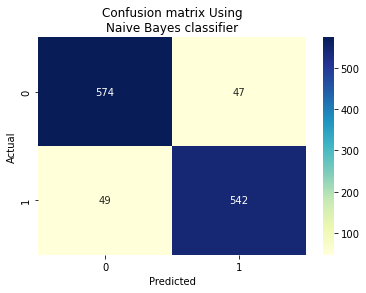

In [263]:
# Naive Bayes classifier
Naive_Bayes_Classifier = MultinomialNB(alpha= 0.01)

# Fit Model in train data
nb_classifier.fit(trainTfidf, y_train)

# Predict Class
y_predict = nb_classifier.predict(testTfidf)

# Calculate Accuracy
print(' Naive Bayes classifier Accuracy : ',  metrics.accuracy_score(y_test, y_predict)*100,"%")

# plot confusion matrix
ConfusionMatrix = metrics.confusion_matrix(y_test, y_predict)
PlotConfusionMatrix(ConfusionMatrix,'Naive Bayes classifier')


SVM Accuracy :  92.07920792079209 %


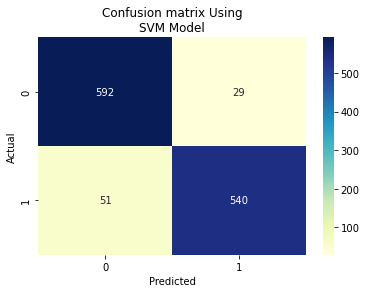

In [264]:
# SVM Classifier
SVM_Classifier = svm.SVC(kernel='linear') # Linear Kernel

# fit Model in train data
SVM_Classifier.fit(trainTfidf, y_train)

# Calculate Accuracy
print('SVM Accuracy : ', metrics.accuracy_score(y_test, y_predict)*100,"%")

# Predict Class
y_predict = SVM_Classifier.predict(testTfidf)

# plot confusion matrix
ConfusionMatrix = metrics.confusion_matrix(y_test, y_predict)
PlotConfusionMatrix(ConfusionMatrix,'SVM Model')


Logistic Regression Accuracy :  91.996699669967 %


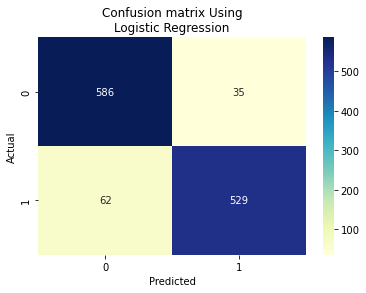

In [265]:
# LogisticRegression
Logistic_Model = LogisticRegression()

# fit model with data
Logistic_Model.fit(trainTfidf, y_train)

# Predict Class
y_predict=Logistic_Model.predict(testTfidf)

# Calculate Accuracy
print('Logistic Regression Accuracy : ', metrics.accuracy_score(y_test, y_predict)*100,"%")

# plot confusion matrix
ConfusionMatrix = metrics.confusion_matrix(y_test, y_predict)
PlotConfusionMatrix(ConfusionMatrix,'Logistic Regression')


## #Finish Project Alhamdellah :) 